# COMP7404 - Assignment 4

## Part A: Conceptual Questions

Solve the following questions by hand. You can write your answer on a seperate paper (submit as *.pdf) or type it below and submit together with Part B as a single *.ipynb file.


### A1
Consider a Perceptron with 2 inputs and 1 output. Let the weights of the Perceptron be $w_1 = 1$ and $w_2 = 1$ and let the bias be $w_0 = -1.5$. Calculate the output of the following inputs:(0, 0), (1, 0), (0, 1), (1, 1)

*Your answer here*

Answer of `A1`: 
+ (0,0)-> -1.5
+ (1,0)-> -0.5
+ (0,1)-> -0.5
+ (1,1)-> 0.5


### A2
Define a perceptron for the following logical functions: AND, NOT, NAND, NOR


*Your answer here*



In [15]:
def perceptron_and(x1, x2):
    # AND: This perception has two inputs. w_1=1, w_2=1, bias=-1.5
    w1, w2, theta = 1, 1, 1.5
    tmp = x1 * w1 + x2 * w2
    if tmp <= theta:
        return 0
    else:
        return 1
    
def perceptron_not(x):
    # NOT: This perception has one input. w=-1, bias=0.5
    w, theta = -1, -0.5
    tmp = x * w
    if tmp <= theta:
        return 0
    else:
        return 1
    
def perceptron_nand(x1, x2):
    # NAND: This perception has two inputs. w_1=-1, w_2=-1, bias=1.5
    w1, w2, theta = -1, -1, -1.5
    tmp = x1 * w1 + x2 * w2
    if tmp <= theta:
        return 0
    else:
        return 1

def perceptron_nor(x1, x2):
    # NOR: Thie perception has two inputs. w_1=-1,w_2=-1, bias=1
    w1, w2, theta = -1, -1, -1
    tmp = x1 * w1 + x2 * w2
    if tmp <= theta:
        return 0
    else:
        return 1
    
# Test
test_units = [(0, 0), (1, 0), (0, 1), (1, 1)]
print("-----AND-----")
for test_unit in test_units:
    print(f"Input: {test_unit}")
    print(f"Output: {perceptron_and(test_unit[0], test_unit[1])}")
    print("**********")
print("-----NOT-----")
for test_unit in [0, 1]:
    print(f"Input: {test_unit}")
    print(f"Output: {perceptron_not(test_unit)}")
    print("**********")
    
print("-----NAND-----")
for test_unit in test_units:
    print(f"Input: {test_unit}")
    print(f"Output: {perceptron_nand(test_unit[0], test_unit[1])}")
    print("**********")
    
print("-----NOR-----")
for test_unit in test_units:
    print(f"Input: {test_unit}")
    print(f"Output: {perceptron_nor(test_unit[0], test_unit[1])}")
    

-----AND-----
Input: (0, 0)
Output: 0
**********
Input: (1, 0)
Output: 0
**********
Input: (0, 1)
Output: 0
**********
Input: (1, 1)
Output: 1
**********
-----NOT-----
Input: 0
Output: 1
**********
Input: 1
Output: 0
**********
-----NAND-----
Input: (0, 0)
Output: 1
**********
Input: (1, 0)
Output: 1
**********
Input: (0, 1)
Output: 1
**********
Input: (1, 1)
Output: 0
**********
-----NOR-----
Input: (0, 0)
Output: 1
Input: (1, 0)
Output: 0
Input: (0, 1)
Output: 0
Input: (1, 1)
Output: 0


### A3
The parity problem returns 1 if the number of inputs that are 1 is even, and 0 otherwise. Can a perceptron learn this problem for 3 inputs? 


*Your answer here*

In [16]:
# For 2 inputs:
# This question can be simplified as $(X_1 AND X_2) OR (X_1 NOR X_2)$.
# This is equivalent to X_1 XNOR X_2.
# So, this perception needs two layers.

def perceptron_or(x1, x2):
    # OR: This perception has two inputs. w_1=1, w_2=1, bias=-0.5
    w1, w2, theta = 1, 1, 0.5
    tmp = x1 * w1 + x2 * w2
    if tmp <= theta:
        return 0
    else:
        return 1

def perceptron_xnor(x1,x2):
    # This perception has two inputs. w_1=1, w_2=1, bias=-1.5
    # This perception is X_1 AND X_2
    and_result = perceptron_and(x1, x2)
    # This perception has two inputs. w_1=-1, w_2=-1, bias=1
    # This perception is X_1 NOR X_2
    nor_result = perceptron_nor(x1, x2)
    # This perception has two inputs. w_1=1, w_2=1, bias=-1.5
    # This perception is (X_1 AND X_2) OR (X_1 NOR X_2)
    return perceptron_or(and_result, nor_result)

# Test
print("-----Is the number of input 1 even?-----")
for test_unit in test_units:
    print(f"Input: {test_unit}")
    print(f"Output: {perceptron_xnor(test_unit[0], test_unit[1])}")
    print("**********")



# For 3 inputs:
# This is equivalent to (X_1 XNOR X_2 AND NOT X_3) OR (X_1 AND X_2 XNOR X_3) OR (X_1 AND X_3 XNOR X_3)

def is_even_inputs(x1, x2, x3):
    cache1 = perceptron_and(perceptron_xnor(x1, x2), perceptron_not(x3))
    cache2 = perceptron_and(perceptron_xnor(x2, x3), perceptron_not(x1))
    cache3 = perceptron_and(perceptron_xnor(x1, x3), perceptron_not(x2))
    return perceptron_or(perceptron_or(cache1, cache2), cache3)
test_case_3_inputs = [(0, 0, 0), (1, 0, 0), (0, 1, 0), (0, 0, 1), (1, 1, 0), (1, 0, 1), (0, 1, 1), (1, 1, 1)]
print("-----Is the number of input 1 even?-----")
for test_unit in test_case_3_inputs:
    print(f"Input: {test_unit}")
    print(f"Output: {is_even_inputs(test_unit[0], test_unit[1], test_unit[2])}")
    print("**********")
    



-----Is the number of input 1 even?-----
Input: (0, 0)
Output: 1
**********
Input: (1, 0)
Output: 0
**********
Input: (0, 1)
Output: 0
**********
Input: (1, 1)
Output: 1
**********
-----Is the number of input 1 even?-----
Input: (0, 0, 0)
Output: 1
**********
Input: (1, 0, 0)
Output: 0
**********
Input: (0, 1, 0)
Output: 0
**********
Input: (0, 0, 1)
Output: 0
**********
Input: (1, 1, 0)
Output: 1
**********
Input: (1, 0, 1)
Output: 1
**********
Input: (0, 1, 1)
Output: 1
**********
Input: (1, 1, 1)
Output: 0
**********


### A4
Suppose that the following are a set of point in two classes:

*   Class1: $(1, 1), (1, 2), (2, 1)$
*   Class2: $(0, 0), (1, 0), (0, 1)$

Plot them and find the optimal separating line. What are the support vectors, and what is the meaning?


*Your answer here*


Support vectors are the data points that lie closest to the decision boundary (or hyperplane) in a Support Vector Machine (SVM) model. They are the data points that are most difficult to classify and have a direct bearing on the optimum location of the decision surface.


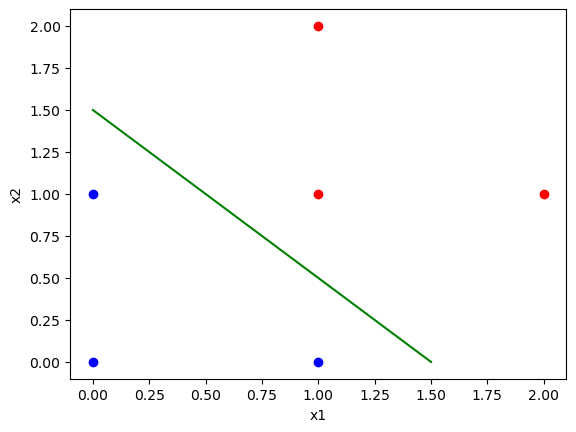

In [17]:
import matplotlib.pyplot as plt
class1 = [(1,1), (1,2), (2,1)]
class2 = [(0,0), (1,0), (0,1)]

plt.scatter([x[0] for x in class1], [x[1] for x in class1], color='red')
plt.scatter([x[0] for x in class2], [x[1] for x in class2], color='blue')
plt.plot([0, 1.5], [1.5, 0], color='green')
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()




### A5
Suppose that the probability of five events are $P(first) = 0.5, P(second) = P(third) = P(fourth) = P(fifth) = 0.125$. Calculate the entropy and write down in words what this means. 


*Your answer here*
In this case, the sum of probabilities are 1. 

$I_H(t)=-\sum^c_{i=1}p(i|t)\log_2{p(i|t)}$

In this case, $Entropy=-(0.5\times\log_2 0.5 + 0.125\times\log_2 0.125 + 0.125\times\log_2 0.125 + 0.125\times\log_2 0.125)= 2$

Entropy is a measure of uncertainty, the higher the entropy is, the more uncertainty there are.

In [18]:
import math
print(-(0.5*math.log2(0.5) + 4*0.125*math.log2(0.125)))

2.0


### A6
Design a decision tree that computes the logical AND function. How does it compare to the Perceptron solution?





In [19]:
#         [Input1]
#        /       \
#     True      False
#     /           \
# [Input2]       Output=False
#  /     \
# True  False
#  |      |
# Output=True  Output=False

def decision_tree_and(input1, input2):
    if input1:
        if input2:
            return True
        else:
            return False
    else:
        return False
    
    
print("-----DICESION TREE AND-----")
for test_unit in test_units:
    print(f"Input: {test_unit}")
    print(f"Output: {decision_tree_and(test_unit[0], test_unit[1])}")
    print("**********")

-----DICESION TREE AND-----
Input: (0, 0)
Output: False
**********
Input: (1, 0)
Output: False
**********
Input: (0, 1)
Output: False
**********
Input: (1, 1)
Output: True
**********


*Your answer here*

The first decision is based on Input1. If Input1 is False, the output is False.
If Input1 is True, the decision tree checks Input2. If Input2 is False, the output is False. If Input2 is True, the output is True.

The decision tree is more interpretable than the perceptron. The perceptron, while less interpretable, can be trained using learning algorithms to adjust its weights and bias based on data, which is not the case with the decision tree. The perceptron is a linear classifier and can only model linearly separable functions. On the other hand, decision trees can model non-linear decision boundaries by adding more levels to the tree. Decision trees can easily handle multi-output problems, while traditional perceptrons are for binary classification problems. However, multi-layer perceptrons (neural networks) can handle multi-output problems.

### A7
Turn the following politically incorrect data into a decision tree to classify which attributes make a person attractive, and then extract the rules. Use the Gini Impurity.

| Height  | Hair  | Eyes  | Attractive?  |
|:-:|:-:|:-:|:-:|
| Small  | Blonde  | Brown  | No  |
| Tall  | Dark  | Brown  | No  |
| Tall  | Blonde  | Blue  | Yes  |
| Tall  | Dark  | Blue  | No  |
| Small  | Dark  | Blue  | No  |
| Tall  | Red  | Blue  | Yes  |
| Tall  | Blonde  | Brown  | No  |
| Small  | Blonde  | Blue  | Yes  |


*Your answer here*

In the first step, 


### A8
Suppose we collect data for a group of students in a postgraduate machine learning class with features $x_1$ = hours studies, $x_2$ = undergraduate GPA and label $y$ = receive an A. We fit a logistic regression and produce estimated weights as follows: $w_0 = -6$, $w_1 = 0.05$, $w_2 = 1$.

1.  Estimate the probability that a student who studies for 40h and has an undergraduate GPA of 3.5 gets an A in the class
2.  How many hours would the student in part 1. need to study to have a 50% chance of getting an A in the class?

*Your answer here*

### A9
Suppose that we take a data set, divide it into equally-sized training and test sets, and then try out two different classification procedures. First we use logistic regression and get an error rate of 20% on the training data and 30% on the test data. Next we use 1-nearest neighbors (i.e., K=1) and get an average error rate (averaged over both test and training data sets) of 18%. Based on these results, which method should we prefer to use for classification of new observations? Why?

*Your answer here*

### A10

Suppose the features in your training set have very different scales. Which algorithms discussed in class might suffer from this, and how? What can you do about it?


*Your answer here*

### A11


If your AdaBoost ensemble underfits the training data, which hyperparameters should you tweak and how?

*Your answer here*

### A12

What is the benefit of out-of-bag evaluation?

*Your answer here*

### A13

What is the difference between hard and soft voting classifiers?

*Your answer here*

## Part B: Applied Questions

Solve the following questions by implementing solutions in code.

### B1
Consider the following Perceptron code.

In [1]:
import numpy as np

class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.

    """
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [2]:
import pandas as pd

data_src = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

df = pd.read_csv(data_src, header=None)

df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


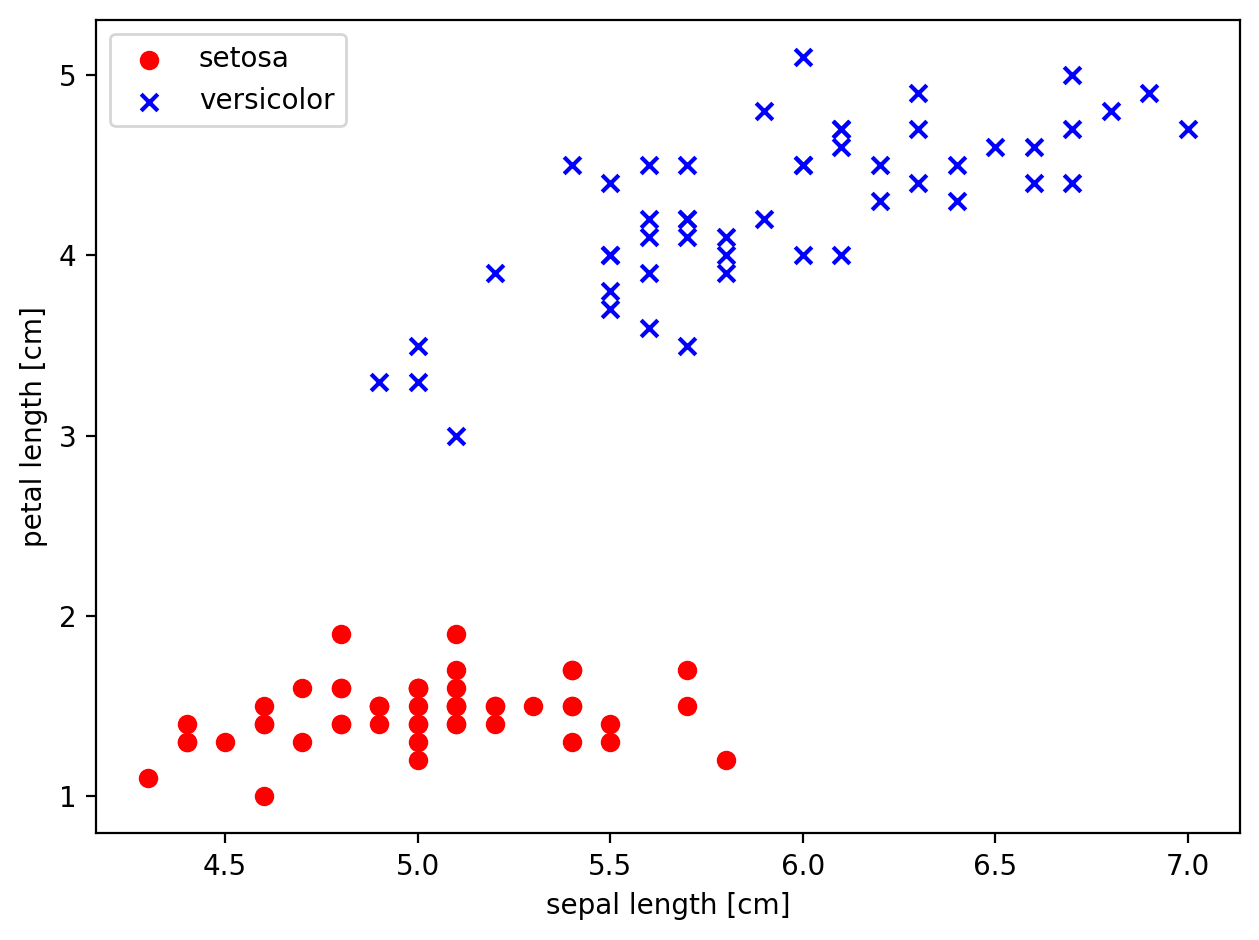

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'
import numpy as np

# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [4]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn = ppn.fit(X, y)

In [5]:
from matplotlib.colors import ListedColormap

from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.01):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

As shown in function plot_decision_regions, the decision regions can be visualized by dense sampling via meshgrid. However, if the grid resolution is not enough, as artificially set below, the boundary will appear inaccurate.

Implement function plot_decision_boundary below to analytically compute and plot the decision boundary.

In [6]:
def plot_decision_boundary(X, y, classifier):    
    
    # replace the two lines below with your code
    # x1_interval = [X[:, 0].min() - 1, X[:, 0].max() + 1]
    x1_interval = [0, X[:, 0].max()+2]
    # x2_interval = [X[:, 1].min() - 1, X[:, 1].max() + 1]
    a = -classifier.w_[1]/classifier.w_[2]
    b = -classifier.w_[0]/classifier.w_[2]
    x2_interval = [a*x1_interval[0] + b, a*x1_interval[1] + b]
    plt.plot(x1_interval, x2_interval, color='green', linewidth=4, label='boundary')

/var/folders/z_/s3bb33wx12q27g0tjw6jggkr0000gn/T/ipykernel_6741/449223450.py:18: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


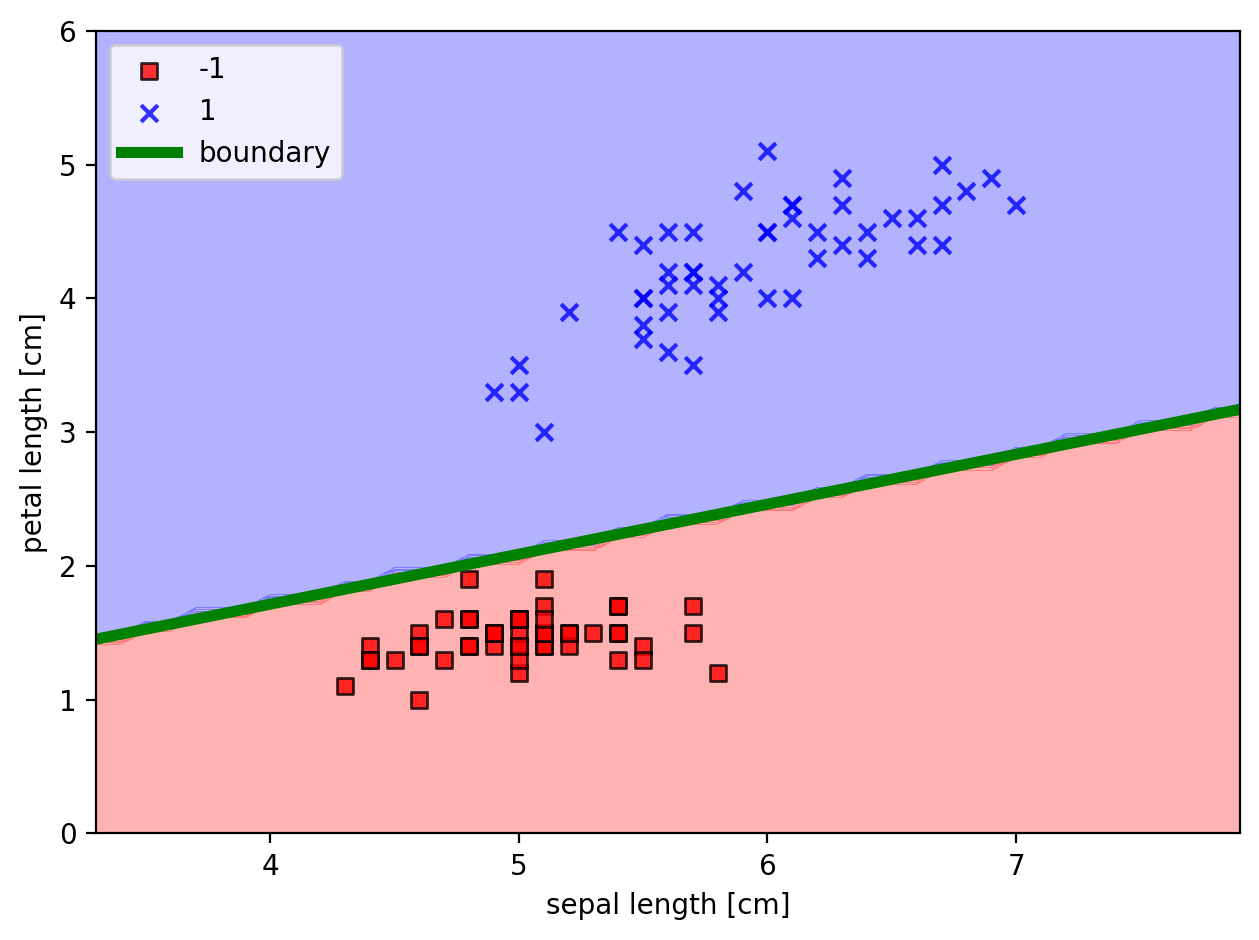

In [7]:
low_res = 0.1 # intentional for this exercise
plot_decision_regions(X, y, classifier=ppn, resolution=low_res)
plot_decision_boundary(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### B2

In class we applied different scikit-learn classifers for the Iris data set.

In this question, we will apply the same set of classifiers over a different data set: hand-written digits.
Please write down the code for different classifiers, choose their hyper-parameters, and compare their performance via the accuracy score as in the Iris dataset.
Which classifier(s) perform(s) the best and worst, and why?

The classifiers include:
* perceptron
* logistic regression
* SVM
* decision tree
* random forest
* KNN

The dataset is available as part of scikit learn, as follows.

In [8]:
from sklearn.datasets import load_digits
digits = load_digits()

X = digits.data # training data
y = digits.target # training label

print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


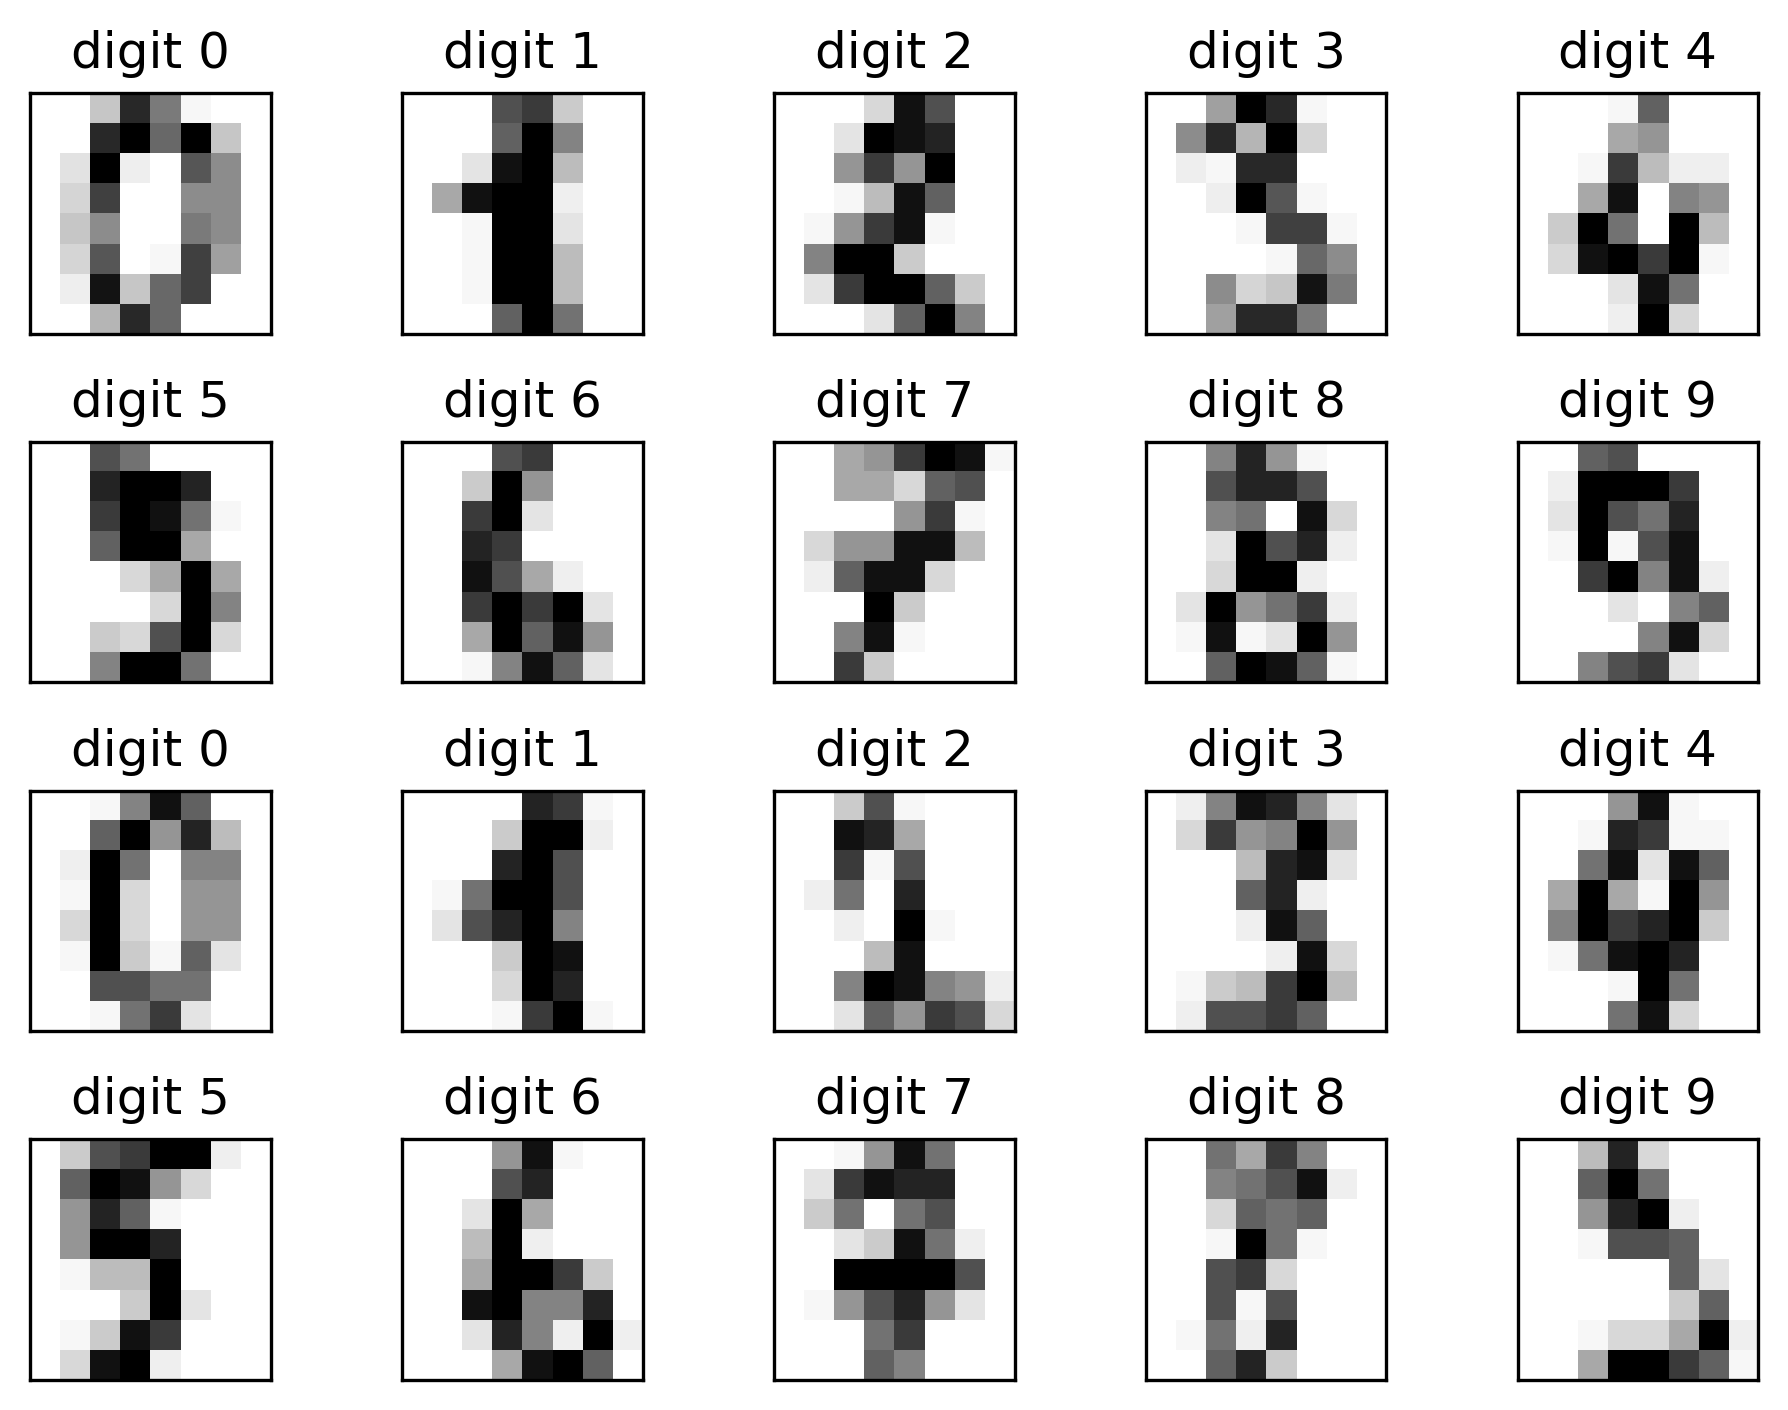

In [9]:
import matplotlib.pyplot as plt
import pylab as pl
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
num_rows = 4
num_cols = 5
fig, ax = plt.subplots(nrows=num_rows, ncols=num_cols, sharex=True, sharey=True)
ax = ax.flatten()
for index in range(num_rows*num_cols):
    img = digits.images[index]
    label = digits.target[index]
    ax[index].imshow(img, cmap='Greys', interpolation='nearest')
    ax[index].set_title('digit ' + str(label))
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

Date Preprocessing

Hint: Divide training and test data set and apply other techinques we have learned if needed.

In [10]:
#Your code here
from sklearn.model_selection import train_test_split
split_rate = [0.6, 0.2, 0.2]
# train_size = int(digits.data.shape[0]*split_rate[0])
# val_size = int(digits.data.shape[0]*split_rate[1])
# X_train = digits.data[:train_size]
# y_train = digits.target[:train_size]
# X_val = digits.data[train_size:train_size+val_size]
# y_val = digits.target[train_size:train_size+val_size]
# X_test = digits.data[train_size+val_size:]
# y_test = digits.target[train_size+val_size:]


X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3, random_state=1, stratify=y)

Classifier #1 Perceptron

In [11]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.metrics import accuracy_score
class DigitPerceptron():
    def __init__(self, class_num):
        self.perceptrons = [Perceptron(eta=0.1, n_iter=20) for _ in range(class_num)]
    def fit(self, X, y):
        for idx, perceptron in enumerate(self.perceptrons):
            y_ = np.where(y == idx, 1, -1)
            perceptron.fit(X, y_)
    def predict(self, X):
        result = []
        for perceptron in self.perceptrons:
            result.append(perceptron.net_input(X))
        return np.argmax(result, axis=0)
    def score(self, X, y):
        return np.mean(self.predict(X) == y)
    
dp = DigitPerceptron(10)
dp.fit(X_train, y_train)
print("Train accuracy: ", dp.score(X_train, y_train))
# print("Validation accuracy: ", dp.score(X_val, y_val))
print("Test accuracy: ", dp.score(X_test, y_test))

        
        
    


Train accuracy:  0.9554494828957836
Test accuracy:  0.9203703703703704


In [12]:
X_train.shape

(1257, 64)

In [13]:
a = np.array([[1,2,3],[4,5,6]])
b = np.array([1,2,3])
np.dot(a,b)

array([14, 32])

In [17]:
1. / (1. + np.exp(-np.clip([1,2], -250, 250)))

array([0.73105858, 0.88079708])

Classifier #2 Logistic Regression

In [29]:
#Your code, including traing and testing, to observe the accuracies.
import math
def sigmoid(x):
    return 1/(1+math.exp(-x))
class LogisticRegression():
    def __init__(self, eta=0.01, n_iter=20) -> None:
        self.eta = eta
        self.n_iter = n_iter
    def fit(self, X, y):
        rgen = np.random.RandomState(42)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost = []
        for i in range(self.n_iter):
            o = self.sigmoid(self.net_input(X))
            errors = (y - o)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = -y.dot(np.log(o)) - ((1 - y).dot(np.log(1 - o)))
            self.cost.append(cost)
        return self
    def sigmoid(self, o):
        # return 1./(1.+np.exp(o))
        return 1. / (1. + np.exp(-np.clip(o, -250, 250)))
        
    def net_input(self, X):
        return np.dot(X,self.w_[1:])+self.w_[0]
    
    def predict(self, X):
        return np.where(np.dot(X,self.w_)>=0,1,0)


class DigitLogisticRegression():
    def __init__(self, class_num):
        self.regressions = [LogisticRegression() for i in range(class_num)]
    def fit(self,X,y):
        for idx, regression in enumerate(self.regressions):
            y_ = np.where(y==idx,1,-1)
            regression.fit(X,y_)
    def predict(self, X):
        result = []
        for regression in self.regressions:
            result.append(regression.net_input(X))
        return np.argmax(result, axis=0)
    def score(self, X, y):
        return np.mean(self.predict(X) == y)

dlr = DigitLogisticRegression(10)
dlr.fit(X_train,y_train)

print("Train accuracy: ", dlr.score(X_train,y_train))

print("Test accuracy: ", dlr.score(X_test, y_test))
        
        


Train accuracy:  0.8782816229116945
Test accuracy:  0.8907407407407407


In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100.0, solver='liblinear', multi_class='ovr')
lr.fit(X_train_std, y_train)



LogisticRegression(C=100.0, multi_class='ovr', solver='liblinear')

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(lr.predict(X_train_std),y_train)
accuracy_score(lr.predict(X_test_std),y_test)



0.9555555555555556

Classifier #3 SVM

In [32]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.svm import SVC
scv = SVC()
scv.fit(X_train,y_train)
print(accuracy_score(scv.predict(X_train),y_train))
print(accuracy_score(scv.predict(X_test),y_test))    


0.9960222752585521
0.9833333333333333


Classifier #4 Decision Tree

In [33]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
print(accuracy_score(dtc.predict(X_train),y_train))
print(accuracy_score(dtc.predict(X_test),y_test))    

1.0
0.8518518518518519


Classifer #5 Random Forest

In [35]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
print(accuracy_score(rfc.predict(X_train),y_train))
print(accuracy_score(rfc.predict(X_test),y_test))  

1.0
0.9685185185185186


Classifier #6 KNN

In [36]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(X_train,y_train)
print(accuracy_score(knc.predict(X_train),y_train))
print(accuracy_score(knc.predict(X_test),y_test))  


0.9912490055688147
0.9833333333333333


### B3
Build a spam classifier:



*   Download examples of spam and ham from Apache SpamAssassin’s public datasets.
*   Unzip the datasets and familiarize yourself with the data format.
*   Split the datasets into a training set and a test set.
*   Write a data preparation pipeline to convert each email into a feature vector. Your preparation pipeline should transform an email into a (sparse) vector that indicates the presence or absence of each possible word. For example, if all emails only ever contain four words, “Hello,” “how,” “are,” “you,” then the email “Hello you Hello Hello you” would be converted into a vector [1, 0, 0, 1] (meaning [“Hello” is present, “how” is absent, “are” is absent, “you” is present]), or [3, 0, 0, 2] if you prefer to count the number of occurrences of each word.
*   You may want to add hyperparameters to your preparation pipeline to control whether or not to strip off email headers, convert each email to lowercase, remove punctuation, replace all URLs with “URL,” replace all numbers with “NUMBER,” or even perform stemming (i.e., trim off word endings; there are Python libraries available to do this).

*   Finally, try out several classifiers and see if you can build a great spam classifier, with both high recall and high precision.

In [ ]:
#Your answer here